# Car prices prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pickle 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

## Dataset Exploration :

In [2]:
DataSet = pd.read_csv("DataSet.csv")

DataSet.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
DataSet.shape

(8128, 13)

In [4]:
DataSet.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [5]:
DataSet.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

We can see that this dataset contains some rows that have empty cells (NaN), In this case we are going to get rid of those rows but we can for example replace those cells with their colmn's mean value

In [6]:
DataSet = DataSet.dropna()
DataSet.isnull().sum().sum()


0

Here, we create 2 functions :
* Numerise : which will help us replace string columns with number (for example : for the transmission column manual is replaced with 0 and automatic is replaced with 1)
* ExtractNum : which will help us extract numerical features from cell (for example : 32 kmpl becomes 32)

In [7]:
def Numerise(DF, Column):
    x = pd.Series(DF[Column])
    col = pd.factorize(x)
    return col

In [8]:
def ExtractNum(DF, Column):
    x = pd.Series(DF[Column])
    x = x.astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
    return np.array(x)

In [9]:
DataSet.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

And finally here we are creating a new DataFrame containing nothing but numerical values, some columns are discarded either because their features are inconsistent(Torque), or because they offer no use in our case(Name)

In [10]:
NewDataSet = pd.DataFrame({"year" : np.array(DataSet["year"]),
                           "SellingPrice" : np.array(DataSet["selling_price"]),
                           "kmDriven" : np.array(DataSet["km_driven"]),
                           "fuel" : Numerise(DataSet, "fuel")[0],
                           "Seller" : Numerise(DataSet, "seller_type")[0],
                           "transmission" : Numerise(DataSet, "transmission")[0],
                           "owner" : Numerise(DataSet, "owner")[0],
                           "mileage" : ExtractNum(DataSet, "mileage"),
                           "engine" : ExtractNum(DataSet, "engine"),
                           "maxPower" : ExtractNum(DataSet, "max_power"),
                           "Seats" : np.array(DataSet["seats"]),
                          })
NewDataSet


,year,SellingPrice,kmDriven,fuel,Seller,transmission,owner,mileage,engine,maxPower,Seats
0,2014,450000,145500,0,0,0,0,234,1248,74,5.0
1,2014,370000,120000,0,0,0,1,2114,1498,10352,5.0
2,2006,158000,140000,1,0,0,2,177,1497,78,5.0
3,2010,225000,127000,0,0,0,0,230,1396,90,5.0
4,2007,130000,120000,1,0,0,0,161,1298,882,5.0
...,...,...,...,...,...,...,...,...,...,...,...
7901,2013,320000,110000,1,0,0,0,185,1197,8285,5.0
7902,2007,135000,119000,0,0,0,3,168,1493,110,5.0
7903,2009,382000,120000,0,0,0,0,193,1248,739,5.0
7904,2013,290000,25000,0,0,0,0,2357,1396,70,5.0


In [11]:
NewDataSet.describe()

,year,SellingPrice,kmDriven,fuel,Seller,transmission,owner,mileage,engine,maxPower,Seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,0.473817,0.199722,0.131672,0.447255,947.702378,1458.708829,2766.125348,5.416393
std,3.863695,8.135827e+05,5.679230e+04,0.545591,0.468575,0.338155,0.710854,925.336832,503.893057,5162.123778,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,624.000000,35.000000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,0.000000,0.000000,0.000000,0.000000,185.000000,1197.000000,100.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,0.000000,0.000000,0.000000,0.000000,240.000000,1248.000000,739.000000,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,1.000000,0.000000,0.000000,1.000000,1944.000000,1582.000000,3748.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,3.000000,2.000000,1.000000,4.000000,3344.000000,3604.000000,108495.000000,14.000000


And here, we scatter plot the selling price with all the other parameters to inspect for relations between them. 

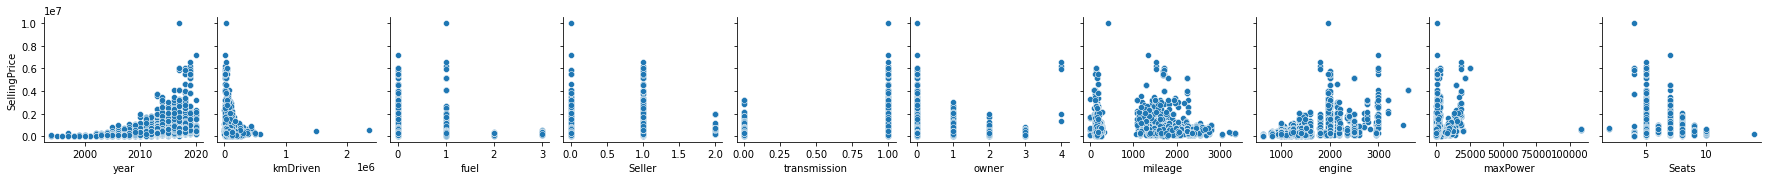

In [12]:
sb.pairplot(data=NewDataSet,
                  x_vars=['year', 'kmDriven', 'fuel', 'Seller', 'transmission', 'owner', 'mileage', 'engine', 'maxPower', 'Seats'],
                  y_vars=['SellingPrice'])

We can see from the graph above, that some of the values just doesn't make sense or are just impossible in real life (for example: mileage > 200 or horsepower > 100000), this is very common in hand typed datasets where human caused error is present, especially with large datasets,
we can just remove those values as shown below :

In [13]:
NewDataSet = NewDataSet[NewDataSet["kmDriven"]<=700000]
NewDataSet = NewDataSet[NewDataSet["maxPower"]<=30000]
NewDataSet = NewDataSet[NewDataSet["mileage"]>1000]/100
NewDataSet.shape

(3329, 11)

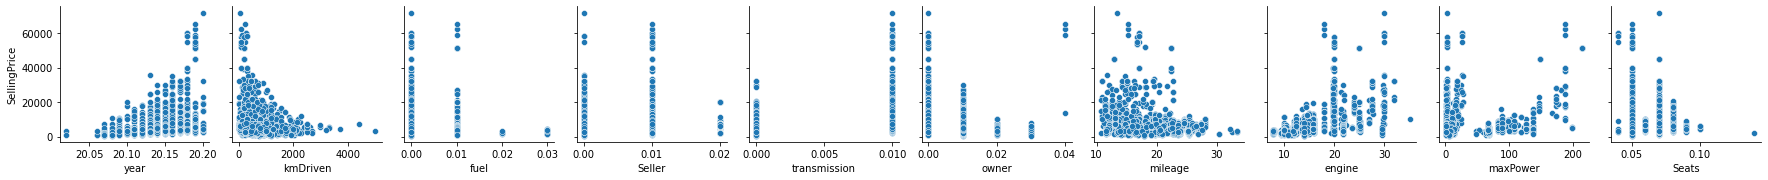

In [14]:
sb.pairplot(data=NewDataSet,
                  x_vars=['year', 'kmDriven', 'fuel', 'Seller', 'transmission', 'owner', 'mileage', 'engine', 'maxPower', 'Seats'],
                  y_vars=['SellingPrice'])

We can see from the graph below that the Selling price have some relation with the following columns :
* Year
* kmDriven
* owner
* mileage
* engine
* maxPower
* Seats 

## Preparing for Training :
Before we train our model we first have to separate our dataset to 2 seperate DataFrames:
* Features : which contains the input for the model
* Labels : the expected output<br> 
(in our case :
* the features contains : Year, kmDriven, owner, mileage, engine, maxPower, seats
* the label is the selling price)

In [15]:
X = NewDataSet.drop(["SellingPrice", "fuel", "Seller", "transmission"], axis = 1)
Y = pd.DataFrame({"SellingPrice" : NewDataSet["SellingPrice"]})

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

Instansiating our  neural network model inside a pipeline, this pipeline contains a StandardScaler which allows us to normalize the input for our model, it also contains an MLPRegressor (Multi-Layer Perceptron Regressor) with 2 hidden Layers each containing 64 nodes.

After that we fit our model.

In [17]:
regressor = make_pipeline(
    StandardScaler(),
    MLPRegressor(
        hidden_layer_sizes = (64, 64), 
        activation = "relu",
        solver = "adam",
        alpha = 0.0005,
        learning_rate='constant', 
        learning_rate_init=0.005,
        max_iter = 10000
    )
)

regressor.fit(X_train, Y_train)


/home/chiheb/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(alpha=0.0005, hidden_layer_sizes=(64, 64),
                              learning_rate_init=0.005, max_iter=10000))])

As we can see below our model has an over-all accuracy of 97.75% when tested with the test data we created earlier :

In [18]:
(regressor.score(X_test, Y_test))**0.5

0.9774887539186584

Here, we make a direct comparison between the expected selling price and the predicted selling price :

In [19]:
results = pd.DataFrame({
    "Expected" : (Y_test["SellingPrice"]), 
    "Predicted" :(regressor.predict(X_test))
})

results.head()

,Expected,Predicted
7125,33500.00,35266.566733
1440,8500.00,7722.422296
2357,5000.00,4863.897270
2691,5099.99,5383.063916
1224,1250.00,2440.586752


All in all, the model is quite accurate for most cases, but is a bit hit-or-miss depending on the input, as we can see below, most of the time, the model will work as expected !

In [20]:
results.describe()

,Expected,Predicted
count,833.000000,833.000000
mean,7687.802737,7724.883712
std,9595.441682,9473.098670
min,600.000000,-4771.089065
25%,3200.000000,3240.470913
50%,5150.000000,5182.749003
75%,7400.000000,7467.591467
max,60000.000000,58983.081762


We Use Pickle to save the Model Object as a binary file that you can use in other projects as shown below :

In [21]:
pickle.dump(regressor, open("Regressor", 'wb'))

In [22]:
LoadedModel = pickle.load(open("Regressor", 'rb'))
LoadedModel.predict(X_test[:1])

array([35266.56673323])